In [562]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBeoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [563]:
os.chdir("D:\\OneDrive\\Nexus\\New Beginning\\Internships\\CodSoft\\Task 2\\Dataset")

In [564]:
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

In [565]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [566]:
def dropDuplicates(data):
    print(f"Prior Dimensions: ", {data.shape})
    if data.duplicated().any():
        print("Duplicats Found!") 
        data = data.drop_duplicates()
        print(f"Posterior Dimensions: ", {data.shape})
    else:
        print("No Duplicats Found!")

In [567]:
dropDuplicates(train)

Prior Dimensions:  {(1296675, 23)}
No Duplicats Found!


In [568]:
dropDuplicates(test)

Prior Dimensions:  {(555719, 23)}
No Duplicats Found!


In [569]:
def isNull(data):
    null = data.isna().sum().sum()
    if null == 0:
        print("No Null Values found!")
    else:
        print("Null Values found:", null)

In [570]:
isNull(test)

No Null Values found!


In [571]:
isNull(train)

No Null Values found!


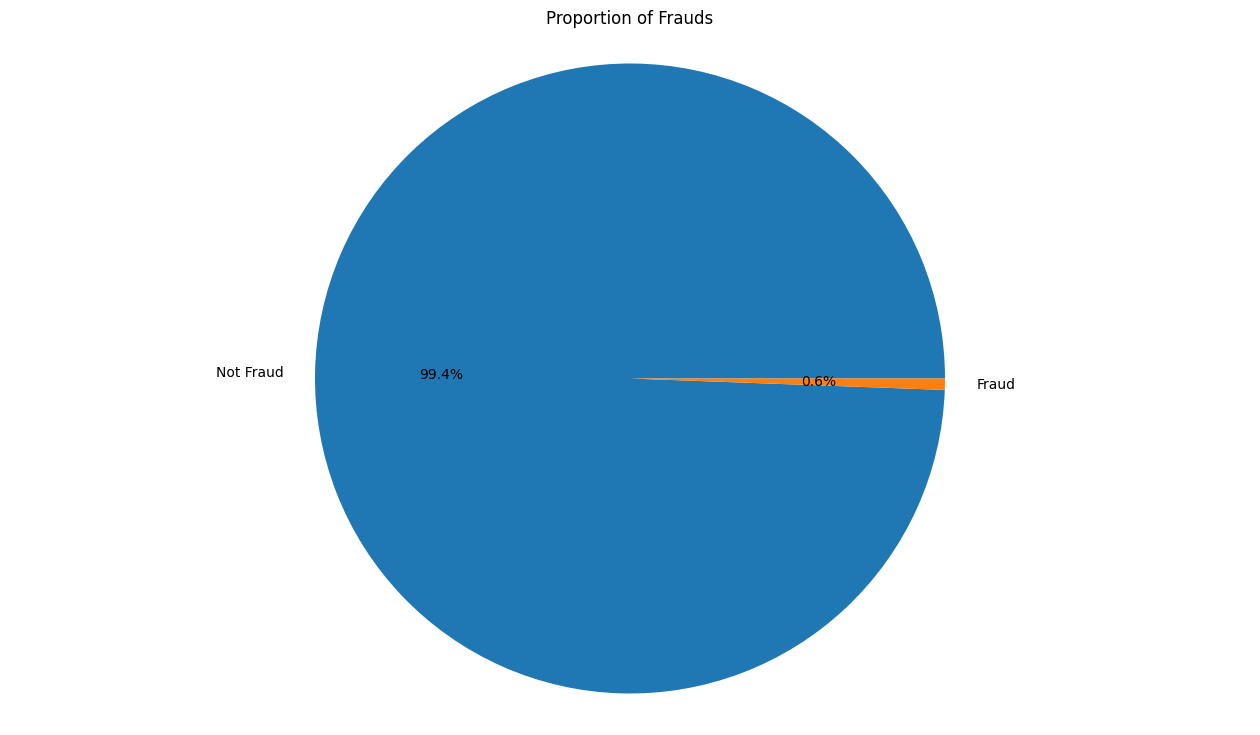

In [572]:
plt.figure(figsize=(16,9))
labels = ["Not Fraud", "Fraud"]
val = train.is_fraud.value_counts()
plt.pie(val, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of Frauds")
plt.axis("equal")
plt.show()

In [573]:
fraud = train[train["is_fraud"] == 1]
legitimate = train[train["is_fraud"] == 0]

legitimate = resample(legitimate, replace=False, n_samples=2*len(fraud))

data = pd.concat([fraud, legitimate], axis=0)

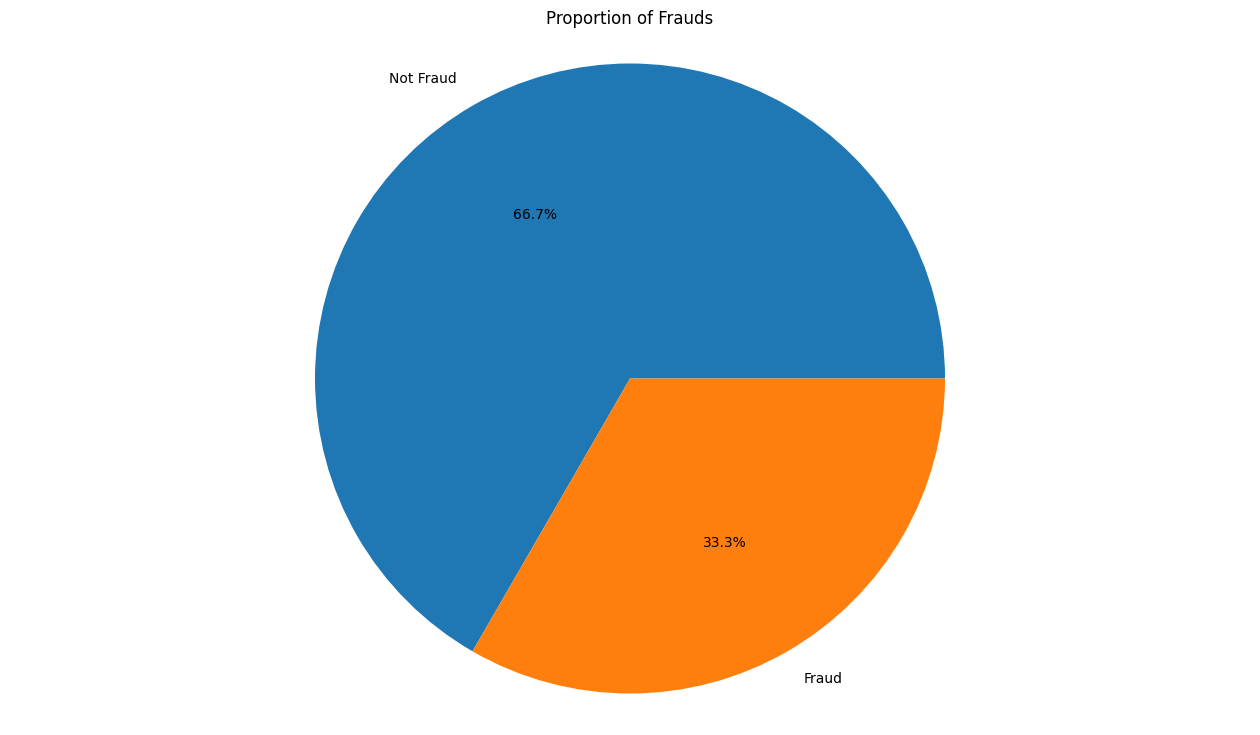

In [574]:
plt.figure(figsize=(16,9))
labels = ["Not Fraud", "Fraud"]
val = data.is_fraud.value_counts()
plt.pie(val, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of Frauds")
plt.axis("equal")
plt.show()

In [575]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22518 entries, 2449 to 932406
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22518 non-null  int64  
 1   trans_date_trans_time  22518 non-null  object 
 2   cc_num                 22518 non-null  int64  
 3   merchant               22518 non-null  object 
 4   category               22518 non-null  object 
 5   amt                    22518 non-null  float64
 6   first                  22518 non-null  object 
 7   last                   22518 non-null  object 
 8   gender                 22518 non-null  object 
 9   street                 22518 non-null  object 
 10  city                   22518 non-null  object 
 11  state                  22518 non-null  object 
 12  zip                    22518 non-null  int64  
 13  lat                    22518 non-null  float64
 14  long                   22518 non-null  float64
 15  cit

In [576]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22518 entries, 2449 to 932406
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22518 non-null  int64  
 1   trans_date_trans_time  22518 non-null  object 
 2   cc_num                 22518 non-null  int64  
 3   merchant               22518 non-null  object 
 4   category               22518 non-null  object 
 5   amt                    22518 non-null  float64
 6   first                  22518 non-null  object 
 7   last                   22518 non-null  object 
 8   gender                 22518 non-null  object 
 9   street                 22518 non-null  object 
 10  city                   22518 non-null  object 
 11  state                  22518 non-null  object 
 12  zip                    22518 non-null  int64  
 13  lat                    22518 non-null  float64
 14  long                   22518 non-null  float64
 15  cit

In [577]:
dropCol = ['Unnamed: 0','first','last', 'unix_time', 'dob', 'cc_num', 'zip', 'city', 'street', 'state', 'trans_num', 'trans_date_trans_time']
data = data.drop(dropCol, axis=1)
test = test.drop(dropCol, axis=1)
data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
2449,fraud_Rutherford-Mertz,grocery_pos,281.06,M,35.9946,-81.7266,885,Soil scientist,36.430124,-81.179483,1
2472,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,29.4400,-98.4590,1595797,Horticultural consultant,29.819364,-99.142791,1
2523,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,29.4400,-98.4590,1595797,Horticultural consultant,29.273085,-98.836360,1
2546,fraud_Erdman-Kertzmann,gas_transport,7.03,M,35.9946,-81.7266,885,Soil scientist,35.909292,-82.091010,1
2553,fraud_Koepp-Parker,grocery_pos,275.73,F,29.4400,-98.4590,1595797,Horticultural consultant,29.786426,-98.683410,1


In [578]:
cat_att = ['merchant', 'category', 'gender', 'job']
def encode(data):
    for col in cat_att:
        data[col] = LabelEncoder().fit_transform(data[col])
    return data

In [579]:
encode(data)
encode(test)

,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,40.4931,-91.8912,519,460,39.946837,-91.333331,0
555715,264,7,111.84,1,29.0393,-95.4401,28739,198,29.661049,-96.186633,0
555716,496,7,86.88,0,46.1966,-118.9017,3684,294,46.658340,-119.715054,0
555717,75,13,7.99,1,44.6255,-116.4493,129,58,44.470525,-117.080888,0


In [581]:
test.head()

,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,44.959148,-85.884734,0


In [582]:
input = ['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop', 'job', 'merch_lat', 'merch_long']
target = 'is_fraud'

In [583]:
x_train = data[input]
x_test = test[input]
y_train = data[target]
y_test = test[target]

In [584]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [585]:
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1106)

In [586]:
def Model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {round(acc,4)}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [587]:
Model(DecisionTreeClassifier(), x_train, x_test, y_train, y_test)

Accuracy Score: 0.8468
[[470016  83558]
 [  1587    558]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92    553574
           1       0.01      0.26      0.01      2145

    accuracy                           0.85    555719
   macro avg       0.50      0.55      0.46    555719
weighted avg       0.99      0.85      0.91    555719



In [588]:
Model(RandomForestClassifier(), x_train, x_test, y_train, y_test)

Accuracy Score: 0.826
[[458245  95329]
 [  1375    770]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.90    553574
           1       0.01      0.36      0.02      2145

    accuracy                           0.83    555719
   macro avg       0.50      0.59      0.46    555719
weighted avg       0.99      0.83      0.90    555719



In [589]:
Model(GradientBoostingClassifier(), x_train, x_test, y_train, y_test)

Accuracy Score: 0.7976
[[442622 110952]
 [  1517    628]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    553574
           1       0.01      0.29      0.01      2145

    accuracy                           0.80    555719
   macro avg       0.50      0.55      0.45    555719
weighted avg       0.99      0.80      0.88    555719

